## Вспомогательные функции

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import log10, floor, ceil

In [5]:
def mnk(x, y):
    b = (np.mean(x*y) - np.mean(x)*np.mean(y))/(np.mean(x**2) - np.mean(x)**2)
    a = np.mean(y) - b*np.mean(x)
    sb = 1/np.sqrt(len(x)) * np.sqrt((np.mean(y**2) - np.mean(y)**2)/(np.mean(x**2) - np.mean(x)**2) - b**2)
    sa = sb*np.sqrt(np.mean(x**2) - np.mean(x)**2)
    
    return a, b, sa, sb

def mnk_a0(x, y):
    b = np.mean(x*y)/np.mean(x**2)
    sb = 1/np.sqrt(len(x)) * np.sqrt((np.mean(y**2)/np.mean(x**2)) - b**2)
    
    return b, sb

def round_to_1(x):
    return round(x*10**-int(floor(log10(abs(x)))))/10**-int(floor(log10(abs(x))))

def science_notation(x, err):
    err = round_to_1(err)
    x = round(x, len(str(err))-2)
    return f'{str(x) + "0"*(len(str(err)) - len(str(x)))}±{str(err)}', (str(x) + "0"*(len(str(err)) - len(str(x))), str(err))

## Читаем данные и задаём их погрешности

In [6]:
df = pd.read_csv('data/t1.csv')
df

,m,l,M,h,alpha,n,t,w,W
0,337.5,121,0.400207,18.0,14.205565,7,211.95,0.207513,0.001170
1,337.5,97,0.320827,18.0,14.205565,6,221.78,0.169984,0.001118
2,214.4,121,0.254236,17.5,9.470377,3,139.95,0.134688,0.001181
3,214.4,97,0.203809,17.5,9.470377,2,116.45,0.107912,0.001419
4,140.8,121,0.166961,18.0,14.205565,3,213.72,0.088197,0.001160
5,140.8,97,0.133844,18.5,18.940754,3,263.92,0.071421,0.001253
6,75.9,121,0.090002,18.0,14.205565,2,261.02,0.048143,0.000950
7,75.9,97,0.072151,18.7,20.834829,2,326.13,0.038532,0.001115


In [7]:
sm = 0.05
sl = 1
sh = 0.1
st = 0.3


sMs = (np.sqrt((sm/df.m)**2 + (sl/df.l)**2) * df.M).values
sws = (st/df.t * df.w).values
sWs = (np.sqrt((sh/df.h)**2 + (st/df.t)**2) * df.W).values

## Строим график момента сил подвешенного груза от циклической частоты и вычиляем момент трения в горизонтальной оси и момент имульса гироскопа

Mtr = -0.0034±0.0007, 20.0%, L = 1.93±0.02, 1.0%


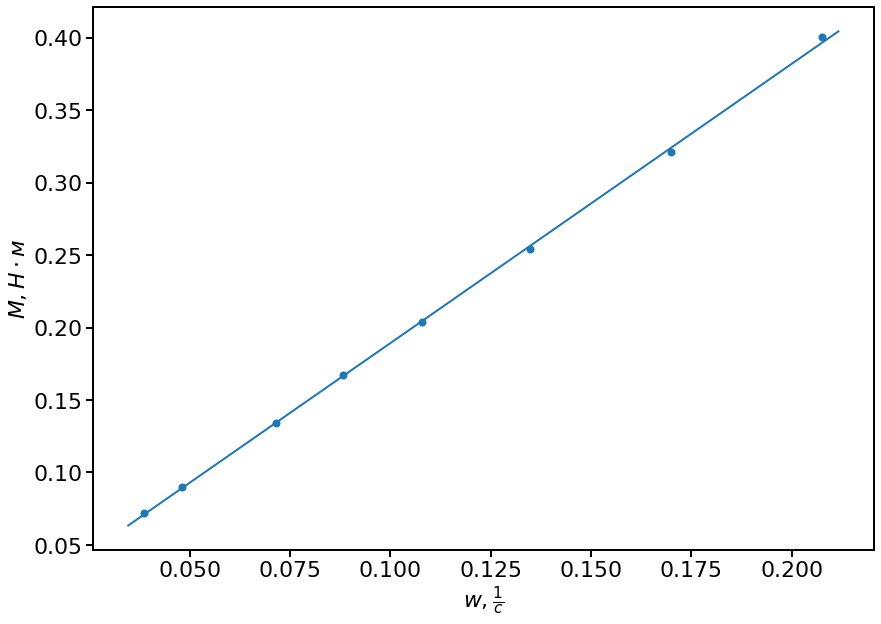

In [63]:
plt.rc('font', size=22)

fig, ax = plt.subplots(figsize=(14, 10))
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

ax.xaxis.set_tick_params(width=2, length=7)
ax.yaxis.set_tick_params(width=2, length=7)

ax.scatter(df.w, df.M, linewidth=2)
a, b, sa, sb = mnk(df.w, df.M)

X = np.array([min(df.w)*0.9, max(df.w)*1.02])
Y = a + b*X
ax.plot(X, Y, linewidth=2)
L = b
sL = sb
Mtr1 = -a

ax.set_xlabel(r"$w, \frac{1}{с}$")
ax.set_ylabel(r"$M, Н\cdotм$")

fig.savefig(r'D:\LabProjects\1.2.5\report\images\1.eps', format='eps')

sa = np.sqrt((np.max(sMs/df.M)**2 + np.max(sws/df.m)**2)*a**2 + sa**2)
sb = np.sqrt((np.max(sMs/df.M)**2 + np.max(sws/df.m)**2)*b**2 + sb**2)
print(f'Mtr = {science_notation(a, sa)[0]}, {round_to_1(abs(sa/a*100))}%, L = {science_notation(b, sb)[0]}, {round_to_1(abs(sb/b*100))}%')

## Вычисляем момент сил трения в вертикальной оси

In [62]:
Mtr2 = np.mean(df.W*L)
Mtr2_std = np.std(df.W*L)/len(df.W)
smtr2 = np.sqrt(np.max(sWs/df.W)**2 + np.max(sb/L)**2) * Mtr2

errMtr2 = np.sqrt((smtr2)**2 + Mtr2_std**2)

print(f'Mtr2 = {science_notation(Mtr2, errMtr2)[0]}, {round_to_1(abs(errMtr2/Mtr2*100))}%')

Mtr2 = 0.002±4e-05, 2.0%


In [19]:
Mtr2

0.0022555799571338467

## Читаем данные по 2 эксперименту

In [10]:
df2 = pd.read_csv('data/t2.csv')
df2

,t,f
0,8.92,385
1,22.53,380
2,35.90,375
3,50.02,370
4,63.77,365
5,73.78,360
6,91.38,355
7,105.56,350
8,119.95,345
9,134.50,340


## Построим график f(t) и убедимся в нелинейности затухания частоты

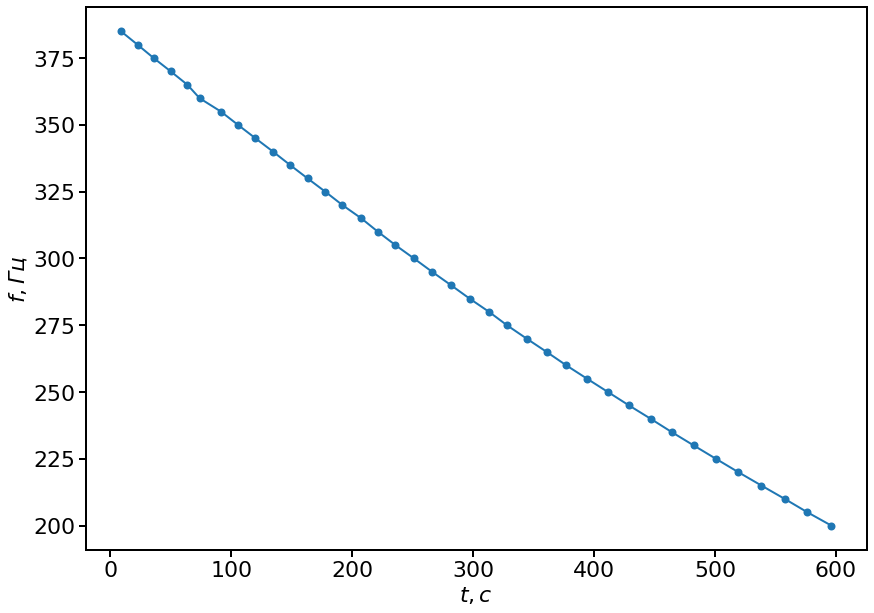

In [26]:
plt.rc('font', size=22)

fig, ax = plt.subplots(figsize=(14, 10))
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

ax.xaxis.set_tick_params(width=2, length=7)
ax.yaxis.set_tick_params(width=2, length=7)

ax.plot(df2.t, df2.f, linewidth=2)
ax.scatter(df2.t, df2.f, linewidth=2)

ax.set_xlabel(r"$t, с$")
ax.set_ylabel(r"$f, Гц$")

fig.savefig(r'D:\LabProjects\1.2.5\report\images\2.eps', format='eps')

## Построим график логарифма производной от логарифма частоты для определения характера зависимости скорости затухания

In [12]:
f, t = df2.f.values, df2.t.values
df_dt = -np.array([f[i] - f[i-1] for i in range(1, len(f))])/np.array([t[i] - t[i-1] for i in range(1, len(t))])
fp = f[1:]

In [13]:
sdf_dt = np.sqrt(2)*st/np.array([t[i] - t[i-1] for i in range(1, len(t))])*df_dt

degree = 0.61±0.07, 10.0%


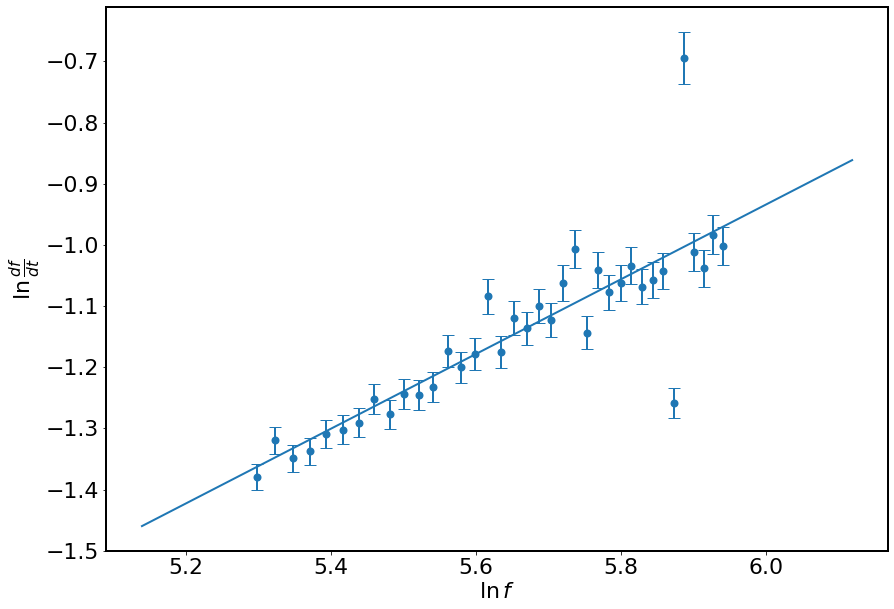

In [65]:
plt.rc('font', size=22)

fig, ax = plt.subplots(figsize=(14, 10))
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

ax.scatter(np.log(fp), np.log(df_dt), linewidth=2)

a, b, sa, sb = mnk(np.log(fp), np.log(df_dt))

X = np.array([min(np.log(fp))*0.97, max(np.log(fp))*1.03])
Y = a + b*X
ax.plot(X, Y, linewidth=2)
degree = b
ax.errorbar(np.log(fp), np.log(df_dt), yerr=sdf_dt/df_dt, fmt='none', linewidth=2, capsize=6)

ax.set_xlabel(r"$\ln{f}$")
ax.set_ylabel(r"$\ln{\frac{df}{dt}}$")

fig.savefig(r'D:\LabProjects\1.2.5\report\images\3.eps', format='eps')

sb = np.sqrt(np.max(b*sdf_dt/df_dt)**2 + sb**2)
sdegree = sb
print(f'degree = {science_notation(b, sb)[0]}, {round_to_1(abs(sb/b*100))}%')

## Зная линеаризацию построим линеаризованный график в исходных координатах

Начальная частота: 388.9±0.2, 0.04
A: -0.004±4e-06, 0.1


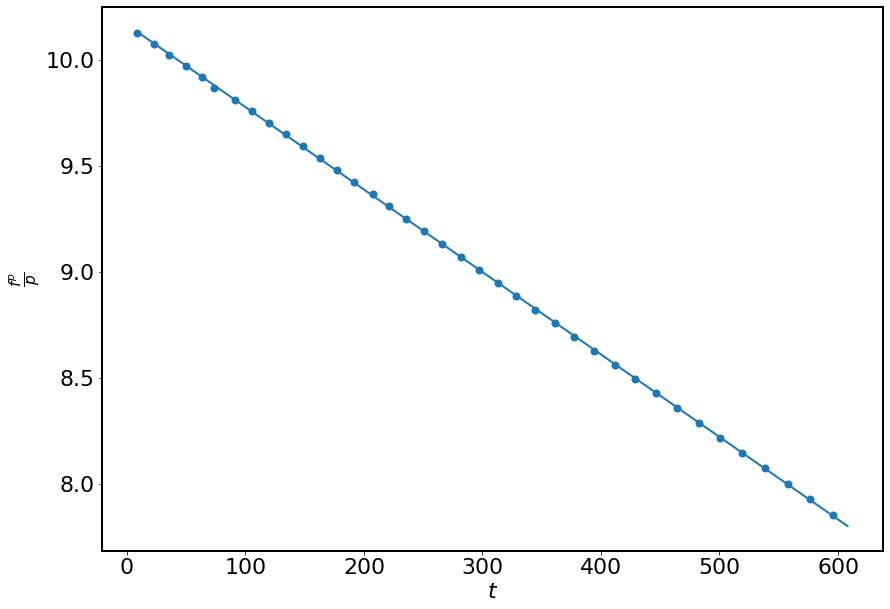

In [25]:
plt.rc('font', size=22)

fig, ax = plt.subplots(figsize=(14, 10))
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

ax.scatter(df2.t, df2.f**(-degree+1), linewidth=2)

a, b, sa, sb = mnk(df2.t, df2.f**(-degree+1))

X = np.array([min(df2.t), max(df2.t)*1.02])
Y = a + b*X
ax.plot(X, Y, linewidth=2)

ax.set_xlabel(r"$t$")
ax.set_ylabel(r"$\frac{f^p}{p}$")

fig.savefig(r'D:\LabProjects\1.2.5\report\images\4.eps', format='eps')

f0 = (a)**(1/(-degree+1))

p = 1-degree
qwert = a**p*p**(1/p)*(np.log(p) - (np.log(p) - 1)/p**2)
sf0 = np.sqrt((qwert*sdegree)**2 + (p*a**(p-1)*p**(1/p) * sa)**2)

A = b
sA = sb

print(f'Начальная частота: {science_notation(f0, sf0)[0]}, {round_to_1(abs(sf0/f0*100))}')
print(f'A: {science_notation(A, sA)[0]}, {round_to_1(abs(sA/A*100))}')

## Найдём момент инерции гироскопа

In [16]:
M = 1616.7/1000
sM = 0.1/1000
D = 7.6/100
sD = 0.05/1000

T = 63
T0 = 80
sT = 0.3

I0 = M*(D/2)**2
sI0 = np.sqrt((sM/M)**2 + (2*sD/D)**2)*I0
I = I0*(T**2/T0**2)
sI = np.sqrt((sI0/I0)**2 + (2*sT/T)**2 + (2*sT/T0)**2)*I
I, sI, sI/I

(0.0014477639439375, 1.7653703451872892e-05, 0.012193772006684955)

In [17]:
I0, sI0

(0.0023345148, 3.075122201295422e-06)

In [14]:
f_ = L/I/2/np.pi
sf_ = np.sqrt((sL/L)**2 + (sI/I)**2)*f_
print(f'Частота из момента инерции: {science_notation(f_, sf_)[0]}, {round_to_1(abs(sf_/f_*100))}%')

Частота из момента инерции: 211.8±3.0, 1.0%


In [59]:
w_0 = L/I
sw_0 = np.sqrt((sL/L)**2 + (sI/I)**2)*w_0
print(f'Частота из момента инерции: {science_notation(w_0, sw_0)[0]}, {round_to_1(abs(sw_0/w_0*100))}%')

Частота из момента инерции: 1330.79±20.0, 1.0%


In [46]:
sw_0

18.437105069791006

## Отношение частот

In [34]:
q = w_0/f0
sq = np.sqrt((sf0/f0)**2 + (sw_0/w_0)**2)*q
print(f'Отношение частот: {science_notation(q, sq)[0]}, {round_to_1(abs(sq/q*100))}%')

Отношение частот: 3.42±0.05, 1.0%


In [43]:
gamma = (A*I)/(q**(-p))
sgamma = np.sqrt((sA/A)**2 + (sI/I)**2 + (p*sq/q)**2 + (sdegree*np.log(q))**2) * gamma
gamma, sgamma

(-9.09161354187339e-06, -7.477373870675464e-07)

In [52]:
print(f'gamma: {science_notation(-gamma*1000000, -sgamma*1000000)[0]}, {round_to_1(abs(sgamma/gamma*100))}%')

gamma: 9.1±0.7, 8.0%


In [50]:
Mtr3 = gamma*w_0
sMtr3 = np.sqrt((sgamma/gamma)**2 + (sw_0/sw_0)**2) * Mtr3

In [51]:
print(f'Mtr_3: {science_notation(Mtr3, sMtr3)[0]}, {round_to_1(abs(sMtr3/Mtr3*100))}%')

Mtr_3: -0.012±-0.01, 100.0%


## Посчитаем момент силы трения в главной оси, зная общую мощность в сети(подключено 3 гироскопа)

In [16]:
#Тут хз вообще
N = 23.5*0.35/3
Mtr3 = N/(2*np.pi*f_)
Mtr3

0.002060174118447601

In [27]:
w_0 = 

NameError: name 'w_0' is not defined